In [41]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [42]:
print(tf.__version__)

2.19.0-dev20241106


In [43]:
data = pd.read_csv('train.csv')
data.shape


(2058, 9)

In [44]:
data.head()

,Name,Spice,Belimbing Sayur,Bunga Lawang,Jahe,Jeruk Nipis,Kunyit,Lengkuas,Mengkudu
0,Belimbing Sayur_1,['Belimbing Sayur'],1,0,0,0,0,0,0
1,Belimbing Sayur_2,['Belimbing Sayur'],1,0,0,0,0,0,0
2,Belimbing Sayur_3,['Belimbing Sayur'],1,0,0,0,0,0,0
3,Belimbing Sayur_4,['Belimbing Sayur'],1,0,0,0,0,0,0
4,Belimbing Sayur_5,['Belimbing Sayur'],1,0,0,0,0,0,0


In [45]:
IMAGE_WIDTH =  244
IMAGE_HEIGHT = 244

X=[]

for i in tqdm(range(data.shape[0])) : 
    path = 'Dataset/train/' + data['Name'][i]+'.png'
    img =  image.load_img(path, target_size=(IMAGE_WIDTH,IMAGE_HEIGHT, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)
    
X=np.array(X)

 71%|███████   | 1451/2058 [00:12<00:03, 160.72it/s]c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 2058/2058 [00:16<00:00, 127.15it/s]


In [46]:
X.shape

(2058, 244, 244, 3)

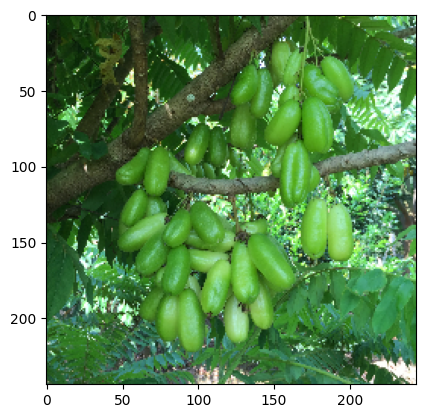

In [47]:
plt.imshow(X[0])

In [48]:
data['Spice'][0]

"['Belimbing Sayur']"

In [49]:
y = data.drop(['Name', 'Spice'], axis=1)
y = y.to_numpy()
y.shape

(2058, 7)

In [50]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, random_state=0, test_size=0.15)

## Building CNN Model

In [51]:
def based_model():
    model = tf.keras.models.Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=X_train[0].shape),
        BatchNormalization(),
        MaxPool2D(2,2),
        Dropout(0.3),
        
        Conv2D(32, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(2,2),
        Dropout(0.3),
        
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(2,2),
        Dropout(0.4),
        
        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(2,2),
        Dropout(0.5),
        
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(7, activation='sigmoid')  # Change to sigmoid for multi-label
    ])
    return model


In [52]:
model=based_model()
model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 242, 242, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 242, 242, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 121, 121, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 121, 121, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 119, 119, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 119, 119, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 57, 57, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 2,885,863 (11.01 MB)

 Trainable params: 2,884,871 (11.00 MB)

 Non-trainable params: 992 (3.88 KB)

In [53]:
model.compile(optimizer='adam',
              loss ='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
# Callbacks
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')

        if train_accuracy >= 0.95 and val_accuracy >= 0.75:
            self.model.stop_training = True
            print("\nReached 95% train accuracy and 85% validation accuracy, so cancelling training!")


In [61]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    validation_data=(X_test, y_test),
    shuffle=True,
    callbacks=[EarlyStoppingCallback()]
)

Epoch 1/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 719ms/step - accuracy: 0.9832 - loss: 0.0157 - val_accuracy: 0.7314 - val_loss: 0.3083
Epoch 2/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 750ms/step - accuracy: 0.9837 - loss: 0.0166 - val_accuracy: 0.7379 - val_loss: 0.3563
Epoch 3/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 48s 870ms/step - accuracy: 0.9847 - loss: 0.0168 - val_accuracy: 0.7152 - val_loss: 0.3760
Epoch 4/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 45s 819ms/step - accuracy: 0.9899 - loss: 0.0128 - val_accuracy: 0.6828 - val_loss: 0.4332
Epoch 5/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 49s 886ms/step - accuracy: 0.9910 - loss: 0.0140 - val_accuracy: 0.7087 - val_loss: 0.3819
Epoch 6/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 48s 869ms/step - accuracy: 0.9868 - loss: 0.0140 - val_accuracy: 0.6731 - val_loss: 0.4183
Epoch 7/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 47s 845ms/step - accuracy: 0.9881 - loss: 0.0158 - val_accuracy: 0.6861 - val_loss: 0.4670
Epoch 8/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 47s 854ms/step - accuracy: 0.9900 - loss: 0.0115 - 

KeyboardInterrupt: 